In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.ensemble import RandomForestClassifier

import cleaner as dc


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('data/consensus_dataset.csv')
df

,ad,consensus
0,Everyone knows that using sunscreen is the bes...,1
1,Protection from UV rays is important. That's w...,1
2,"""Sun protection every day, not just in the sum...",1
3,"The more people you know and places you visit,...",1
4,join thousands of people in fredericton who ar...,1
...,...,...
3326,What does it mean to be a changemaker in the d...,1
3327,Learn and create together. Join our community ...,1
3328,Join our community to get expert whelping advi...,1
3329,A loftier lifestyle awaits you. New luxury ele...,1


In [3]:
# remove adjectives 
df['ad'] = df['ad'].apply(dc.remove_adjectives)

# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_stopwords)

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)


#Apply function on review column
df['ad']= df['ad'].apply(dc.simple_stemmer)

In [4]:
X_train,  X_test, y_train, y_test  = train_test_split(df['ad'], df['consensus'], test_size =0.1  , random_state = 42)

In [5]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train = tf_vectorizer.fit_transform(X_train)
X_test = tf_vectorizer.transform(X_test)

In [9]:
# Creating and training  the model 
clf = RandomForestClassifier(
    n_estimators = 200, 
    criterion = 'gini',
    oob_score = True
)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

accuracy:   0.910
              precision    recall  f1-score   support

non positive       0.90      0.87      0.88       130
    positive       0.92      0.94      0.93       204

    accuracy                           0.91       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.91      0.91      0.91       334

confusion matrix:
[[113  17]
 [ 13 191]]



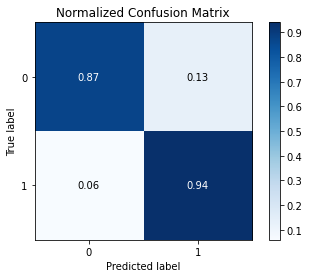

In [10]:
# predict the labels on validation dataset
predictions = clf.predict(X_test)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['non positive', 'positive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [11]:
df_val = pd.read_csv('data/sample.csv')

# remove adjectives 
df_val['ad'] = df_val['ad'].apply(dc.remove_adjectives)

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ', regex=True)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.denoise_text)


#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.simple_stemmer)

accuracy:   0.656
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        51
           1       0.59      0.67      0.63        39

    accuracy                           0.66        90
   macro avg       0.65      0.66      0.65        90
weighted avg       0.66      0.66      0.66        90

confusion matrix:
[[33 18]
 [13 26]]



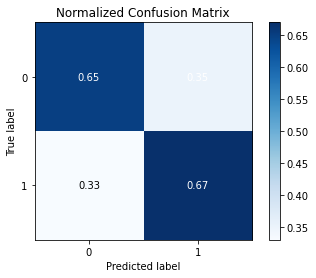

In [13]:
X_val_tf = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']
predictions = clf.predict(X_val_tf)

# compute the performance measures
score = metrics.accuracy_score(y_val, predictions)
print("accuracy:   %0.3f" % score)


print(metrics.classification_report(y_val, predictions, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)
plt.show()